# Test SR model

In [ ]:
import numpy as np 
import torch
from PIL import Image
import matplotlib.pyplot as plt

# 假设你的项目路径配置正确
from src.emcfsys.EMCellFiner.hat.models.hat_model import HATModel
from src.emcfsys.EMCellFiner.hat.models.img_utils import tensor2img

# 1. 初始化模型
path = r"D:\napari_EMCF\EMCFsys\models\EMCellFiner.pth"
# 显式指定 tile_size，防止显存溢出；对于小图可以不用 tile
model = HATModel(scale=4, tile_size=512) 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# 2. 读取与预处理
img_path = r"D:\napari_EMCF\EMCFsys\emcfsys\image\Bock2011_2951_XrV1ciGgTWHjepNf.tif"
img = Image.open(img_path).convert("RGB")

# 转换为 Numpy 并归一化
img_np = np.array(img).astype(np.float32) / 255.
# 转换为 Tensor: (H, W, C) -> (C, H, W) -> (1, C, H, W)
img_torch = torch.from_numpy(img_np).permute(2, 0, 1).unsqueeze(0).to(device)
print(f"Input Shape: {img_torch.shape}")
# 3. 推理
with torch.no_grad():
    output = model(img_torch) 
print(f"Output Shape: {output.shape}")
# 4. 后处理
output = output.cpu()
img_out = tensor2img(output, rgb2bgr=False, min_max=(0, 1))
# 5. 转回 PIL 图片
img_final = Image.fromarray(img_out)

# 验证结果
# img_final.show() 
# img_final.save("result_sr.png")
print("Done.")

In [1]:
from src.emcfsys.EMCellFiner.hat.models.inference_hat import hat_infer_numpy
from src.emcfsys.EMCellFiner.hat.models.hat_model import HATModel
from PIL import Image
import numpy as np
import torch
import time
start = time.time()
img_path = r"D:\napari_EMCF\EMCFsys\emcfsys\image\Bock2011_2951_XrV1ciGgTWHjepNf.tif"
img = Image.open(img_path).convert("RGB").crop([0,0,512,512])
img_np = np.array(img)

model = HATModel(scale=4, tile_size=512)
device = "cuda" #torch.device("cuda" if torch.cuda.is_available() else "cpu")

out = hat_infer_numpy(
    model= model,
    image= img_np,
    device=device,
)

end = time.time()
print("inference time: ", end - start)

c:\Users\YZY\miniconda3\envs\EMCF_napari\Lib\site-packages\timm\models\registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
c:\Users\YZY\miniconda3\envs\EMCF_napari\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Using the model from torch hub : https://github.com/yzy0102/emcfsys/releases/latest/download/EMCellFiner.pth
🕒 函数 'prepare_image' 执行完成，耗时: 0.0035 秒。
	Tile 1/1
🕒 函数 'hat_infer_numpy' 执行完成，耗时: 4.2623 秒。
inference time:  4.740279674530029


# test SR stack images

In [1]:



from src.emcfsys.EMCellFiner.hat.models.inference_hat import hat_infer_numpy
from src.emcfsys.EMCellFiner.hat.models.hat_model import HATModel
from PIL import Image
import numpy as np
import torch
import time
start = time.time()
# img_path = r"D:\napari_EMCF\EMCFsys\emcfsys\image\Bock2011_2951_XrV1ciGgTWHjepNf.tif"
# img = Image.open(img_path).convert("RGB").crop([0,0,512,512])

stack_path = [r"D:\CellChange\Bock3D\image\3004.jpg",
              r"D:\CellChange\Bock3D\image\3044.jpg",
              r"D:\CellChange\Bock3D\image\3054.jpg",]

stack_path = [r"D:\CellChange\Bock3D\image\3004.jpg",]

stack_imgs = np.array([np.array(Image.open(p).convert("L").resize([1024,1024])) for p in stack_path])


model = HATModel(scale=4, tile_size=512)
device = "cuda" #torch.device("cuda" if torch.cuda.is_available() else "cpu")

out = hat_infer_numpy(
    model= model,
    image= stack_imgs,
    device=device,
)

end = time.time()
print("inference time: ", end - start)

c:\Users\YZY\miniconda3\envs\EMCF_napari\Lib\site-packages\timm\models\registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
c:\Users\YZY\miniconda3\envs\EMCF_napari\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Using the model from torch hub : https://github.com/yzy0102/emcfsys/releases/latest/download/EMCellFiner.pth
🕒 函数 'prepare_image' 执行完成，耗时: 0.0020 秒。
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
model inference used: 16.723570108413696
tensor2img used: 0.13810420036315918
🕒 函数 'hat_infer_numpy' 执行完成，耗时: 17.0184 秒。
inference time:  17.362804174423218


In [ ]:
from urllib.request import urlopen
from PIL import Image
import timm

img = Image.open(urlopen(
    'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
))

model = timm.create_model('vit_small_patch16_dinov3.lvd1689m', pretrained=True)
model = model.eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

output = model(transforms(img).unsqueeze(0))  # unsqueeze single image into batch of 1

top5_probabilities, top5_class_indices = torch.topk(output.softmax(dim=1) * 100, k=5)


# test the train

In [ ]:
from src.emcfsys.EMCellFound.train import train_loop

img_dir = r"D:\napari_EMCF\EMCFsys\emcfsys\image"
label_dir = r"D:\napari_EMCF\EMCFsys\emcfsys\label"
save_dir = r"D:\napari_EMCF\EMCFsys\models"

train_loop(img_dir, 
           label_dir, 
           save_dir, 
           model_name='deeplabv3plus',
           backbone_name='convnext_base',
           pretrained = True,
           pretrained_model=None,
           lr=1e-3, batch_size=4, 
           epochs=100, device=None,
           callback=None, target_size=(512, 512), 
           classes_num=2, ignore_index=-1)

model.safetensors:   0%|          | 0.00/354M [00:00<?, ?B/s]

c:\Users\YZY\miniconda3\envs\EMCF_napari\Lib\site-packages\huggingface_hub\file_download.py:121: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\YZY\.cache\huggingface\hub\models--timm--convnext_base.fb_in22k_ft_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


New best model found at epoch 1! IoU=0.6281
New best model found at epoch 2! IoU=0.7630
New best model found at epoch 3! IoU=0.7692
New best model found at epoch 4! IoU=0.8142


# Inference the seg model

c:\Users\YZY\miniconda3\envs\EMCF_napari\Lib\site-packages\timm\models\registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


Pretrained weights loaded successfully.
Pretrained weights loaded successfully.


d:\napari_EMCF\EMCFsys\emcfsys\src\emcfsys\EMCellFound\inference.py:88: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=device

🕒 函数 'prepare_image' 执行完成，耗时: 0.0055 秒。
🕒 函数 'infer_numpy' 执行完成，耗时: 0.1823 秒。
(512, 512) [0 1]


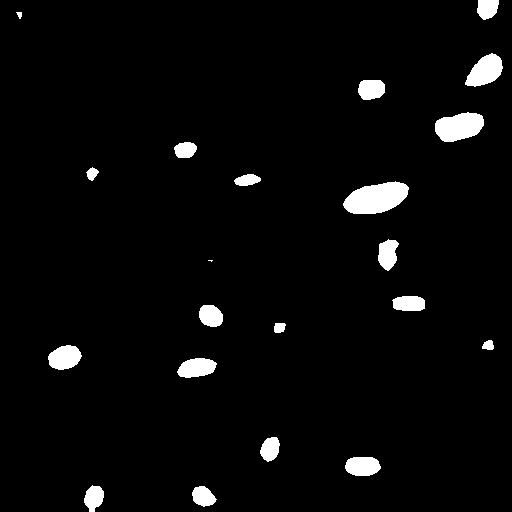

In [1]:
from src.emcfsys.EMCellFound.inference import infer_numpy, load_model
from src.emcfsys.EMCellFound.utils.checkpoint import load_pretrained
import numpy as np
import torch
from PIL import Image
from src.emcfsys.EMCellFound.models.model_factory import get_model
from src.emcfsys.EMCellFound.models.DeepLabv3Plus import DeepLabV3Plus

# img_path = r"D:\napari_EMCF\EMCFsys\emcfsys\image\Bock2011_2951_xZGgUFHBDISQMdco.tif"
img_path = r"D:\CellChange\Bock3D\image\3004.jpg"


model_path = r"D:\napari_EMCF\EMCFsys\models\best_model_epoch98_IoU=0.9024.pth"
# 构建 + 加载模型
model = load_model(model_name="deeplabv3plus", 
                   backbone_name="emcellfound_vit_base", 
                   num_classes=2, 
                   model_path=model_path, 
                   aux_on=False, 
                   device="cuda")

# 加载图像
img = np.array(Image.open(img_path).convert("RGB").resize((512, 512)))

# 推理
mask = infer_numpy(model, img, device="cuda")
print(mask.shape, np.unique(mask))
Image.fromarray(mask*255)

# test the infer_numpy function

In [2]:
from src.emcfsys.EMCellFound.inference import infer_numpy, load_model, infer_full_image
from src.emcfsys.EMCellFound.utils.checkpoint import load_pretrained
import numpy as np
import torch
from PIL import Image
from src.emcfsys.EMCellFound.models.model_factory import get_model
from src.emcfsys.EMCellFound.models.DeepLabv3Plus import DeepLabV3Plus


img_path = r"D:\napari_EMCF\EMCFsys\emcfsys\image\Bock2011_2951_xZGgUFHBDISQMdco.tif"

stack_path = [r"D:\CellChange\Bock3D\image\3004.jpg",
              r"D:\CellChange\Bock3D\image\3014.jpg",
              r"D:\CellChange\Bock3D\image\3024.jpg",
              r"D:\CellChange\Bock3D\image\3034.jpg",
              r"D:\CellChange\Bock3D\image\3044.jpg",
              r"D:\CellChange\Bock3D\image\3054.jpg",]

# stack_path = [r"D:\CellChange\Bock3D\image\3004.jpg",]

stack_imgs = np.array([np.array(Image.open(p).convert("RGB")) for p in stack_path])
print(stack_imgs.shape)


model_path = r"D:\napari_EMCF\EMCFsys\models\best_model_epoch98_IoU=0.9024.pth"

# 构建 + 加载模型

model = load_model(model_name="deeplabv3plus", 
                   backbone_name="emcellfound_vit_base", 
                   num_classes=2, 
                   model_path=model_path, 
                   aux_on=False, 
                   device="cuda")

# 加载图像

# 推理
mask = infer_full_image(model, stack_imgs, (512,512), device="cuda")
print(mask.shape, np.unique(mask))


(6, 2048, 2048, 3)
Pretrained weights loaded successfully.
Pretrained weights loaded successfully.
🕒 函数 'prepare_image' 执行完成，耗时: 0.3208 秒。
🕒 函数 'infer_full_image' 执行完成，耗时: 0.5491 秒。
(6, 2048, 2048) [0 1]


# Test slide inference

In [1]:
from src.emcfsys.EMCellFound.inference import infer_numpy, load_model, infer_full_image, infer_sliding_window
from src.emcfsys.EMCellFound.utils.checkpoint import load_pretrained
import numpy as np
import torch
from PIL import Image
from src.emcfsys.EMCellFound.models.model_factory import get_model
from src.emcfsys.EMCellFound.models.DeepLabv3Plus import DeepLabV3Plus


img_path = r"D:\napari_EMCF\EMCFsys\emcfsys\image\Bock2011_2951_xZGgUFHBDISQMdco.tif"

stack_path = [r"D:\CellChange\Bock3D\image\3004.jpg",
              r"D:\CellChange\Bock3D\image\3014.jpg",
              r"D:\CellChange\Bock3D\image\3024.jpg",
              r"D:\CellChange\Bock3D\image\3034.jpg",
              r"D:\CellChange\Bock3D\image\3044.jpg",
              r"D:\CellChange\Bock3D\image\3054.jpg",]

# stack_path = [r"D:\CellChange\Bock3D\image\3004.jpg",]

stack_imgs = np.array([np.array(Image.open(p).convert("RGB")) for p in stack_path])
print(stack_imgs.shape)


model_path = r"D:\napari_EMCF\EMCFsys\models\best_model_epoch98_IoU=0.9024.pth"

# 构建 + 加载模型

model = load_model(model_name="deeplabv3plus", 
                   backbone_name="emcellfound_vit_base", 
                   num_classes=2, 
                   model_path=model_path, 
                   aux_on=False, 
                   device="cuda")

# 加载图像

# 推理

mask = infer_sliding_window(model=model, image=stack_imgs, window_size= 512, 
    overlap = 0.25, out_channels=2, img_size = (512,512), device = "cuda",)

print(mask.shape, np.unique(mask))


c:\Users\YZY\miniconda3\envs\EMCF_napari\Lib\site-packages\timm\models\registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


(6, 2048, 2048, 3)
Pretrained weights loaded successfully.
Pretrained weights loaded successfully.


d:\napari_EMCF\EMCFsys\emcfsys\src\emcfsys\EMCellFound\inference.py:94: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location=device

🕒 函数 'prepare_image' 执行完成，耗时: 0.3164 秒。
🕒 函数 'infer_sliding_window' 执行完成，耗时: 4.7105 秒。
(6, 2048, 2048) [0 1]
